# **Import from libraries**

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

/opt/conda/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


# **Uploading the images**

In [3]:
path = '../input/animal-faces/afhq/train'

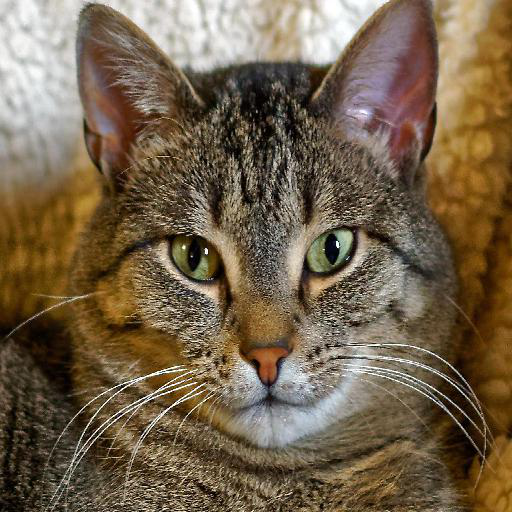

In [4]:
tf.keras.preprocessing.image.load_img('../input/animal-faces/afhq/train/cat/flickr_cat_000014.jpg')

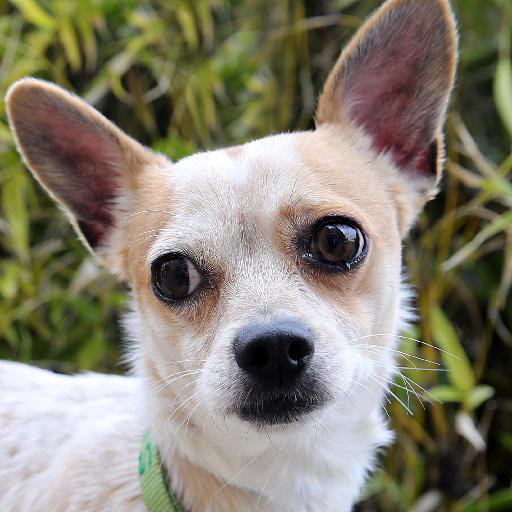

In [5]:
tf.keras.preprocessing.image.load_img('../input/animal-faces/afhq/train/dog/flickr_dog_000014.jpg')

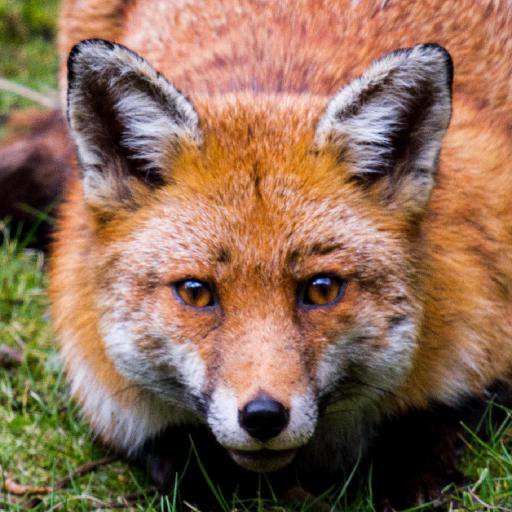

In [6]:
tf.keras.preprocessing.image.load_img('../input/animal-faces/afhq/train/wild/flickr_wild_000019.jpg')

# **Training and Testing Basis**

In [7]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
training_dataset = training_generator.flow_from_directory('../input/animal-faces/afhq/train',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 14630 images belonging to 3 classes.


In [8]:
training_dataset.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [9]:
training_dataset.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

In [10]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('../input/animal-faces/afhq/val',
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 1500 images belonging to 3 classes.


# **Construction and training of the neural network**

In [11]:
network = Sequential()
network.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(3,3)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(3,3)))

network.add(Flatten())

network.add(Dense(units = 7317, activation='relu'))
network.add(Dense(units = 3, activation='softmax'))

2022-06-29 17:59:04.156247: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-29 17:59:04.282406: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-29 17:59:04.283321: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-29 17:59:04.284571: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [12]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 7317)              8436501   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 2

In [13]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [14]:
historic = network.fit(training_dataset, validation_data=test_dataset, epochs=20)

2022-06-29 17:59:07.804401: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-06-29 17:59:09.451767: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


458/458 [==============================] - 140s 291ms/step - loss: 0.4522 - accuracy: 0.8161 - val_loss: 0.2517 - val_accuracy: 0.9007
Epoch 2/20
458/458 [==============================] - 86s 187ms/step - loss: 0.2290 - accuracy: 0.9160 - val_loss: 0.2382 - val_accuracy: 0.9153
Epoch 3/20
458/458 [==============================] - 85s 185ms/step - loss: 0.1848 - accuracy: 0.9301 - val_loss: 0.2627 - val_accuracy: 0.9133
Epoch 4/20
458/458 [==============================] - 90s 196ms/step - loss: 0.1509 - accuracy: 0.9436 - val_loss: 0.1724 - val_accuracy: 0.9393
Epoch 5/20
458/458 [==============================] - 88s 192ms/step - loss: 0.1362 - accuracy: 0.9492 - val_loss: 0.1669 - val_accuracy: 0.9347
Epoch 6/20
458/458 [==============================] - 86s 188ms/step - loss: 0.1259 - accuracy: 0.9524 - val_loss: 0.1130 - val_accuracy: 0.9593
Epoch 7/20
458/458 [==============================] - 85s 186ms/step - loss: 0.1058 - accuracy: 0.9608 - val_loss: 0.1296 - val_accuracy: 0.

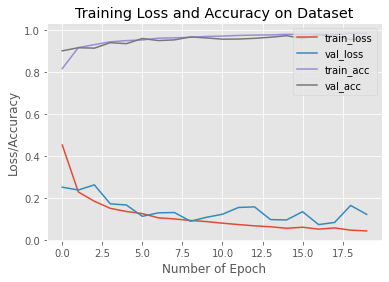

In [15]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), historic.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), historic.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), historic.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), historic.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Number of Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# **Neural network evaluation**

In [16]:
test_dataset.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

In [17]:
forecasts = network.predict(test_dataset)
forecasts

array([[1.0000000e+00, 4.1218870e-19, 4.2163318e-21],
       [1.0000000e+00, 7.7062434e-14, 9.9655364e-16],
       [9.9999988e-01, 2.2968667e-09, 6.6666992e-08],
       ...,
       [3.1008003e-08, 2.0492497e-12, 1.0000000e+00],
       [9.6766496e-20, 3.9878337e-21, 1.0000000e+00],
       [1.4576456e-09, 9.1917741e-08, 9.9999988e-01]], dtype=float32)

In [18]:
forecasts = np.argmax(forecasts, axis = 1)
forecasts

array([0, 0, 0, ..., 2, 2, 2])

In [19]:
test_dataset.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, forecasts)

0.9613333333333334

In [21]:
test_dataset.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, forecasts)
cm

array([[493,   4,   3],
       [ 13, 465,  22],
       [  6,  10, 484]])

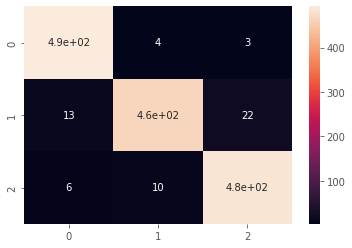

In [23]:
sns.heatmap(cm, annot=True);

In [24]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, forecasts))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       500
           1       0.97      0.93      0.95       500
           2       0.95      0.97      0.96       500

    accuracy                           0.96      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.96      0.96      0.96      1500



# **Single image classification**

In [25]:
image = cv2.imread('../input/animal-faces/afhq/val/wild/flickr_wild_000099.jpg')

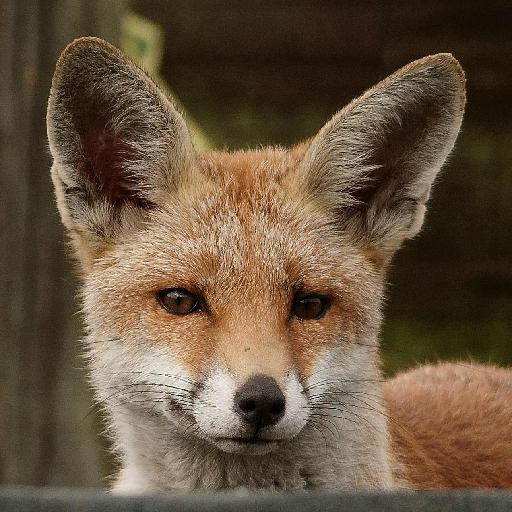

In [26]:
cv2_imshow(image)

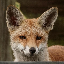

In [27]:
image = cv2.resize(image, (64, 64))
cv2_imshow(image)

In [28]:
image = image / 255
image

array([[[0.16078431, 0.22745098, 0.27843137],
        [0.18039216, 0.23921569, 0.27058824],
        [0.12941176, 0.19607843, 0.23137255],
        ...,
        [0.02352941, 0.06666667, 0.09803922],
        [0.02352941, 0.0745098 , 0.10588235],
        [0.02352941, 0.0745098 , 0.10588235]],

       [[0.18039216, 0.24705882, 0.29803922],
        [0.20392157, 0.2627451 , 0.29411765],
        [0.12156863, 0.18823529, 0.22352941],
        ...,
        [0.01176471, 0.05490196, 0.08627451],
        [0.01960784, 0.05098039, 0.08627451],
        [0.02352941, 0.05490196, 0.09019608]],

       [[0.17254902, 0.23921569, 0.29019608],
        [0.17254902, 0.23137255, 0.2627451 ],
        [0.12156863, 0.18039216, 0.21568627],
        ...,
        [0.01176471, 0.05490196, 0.08627451],
        [0.02745098, 0.05098039, 0.08627451],
        [0.02352941, 0.04705882, 0.08235294]],

       ...,

       [[0.3372549 , 0.38039216, 0.38431373],
        [0.36470588, 0.40784314, 0.41176471],
        [0.36078431, 0

In [29]:
image.shape

(64, 64, 3)

In [30]:
image = image.reshape(-1, 64, 64, 3)
image.shape

(1, 64, 64, 3)

In [31]:
result = network(image)
result

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.00192366, 0.00245248, 0.9956239 ]], dtype=float32)>

In [32]:
result = np.argmax(result)
result

2

In [33]:
test_dataset.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

In [34]:
if result == 0:
    print('Cat')
else:
    if result == 1:
        print('Dog')
    else:
        print('Wild')

Wild
